# **Tugas Praktikum**

# 1. Tugas K-Means


**Buatlah sebuah model K-Means dengan ketentuan,**

**1. Gunakan data 'Mall_Customers.csv'**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = '/content/drive/MyDrive/Mall_Customers.csv'
df = pd.read_csv(data)

**2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)**

Fitur yang tepat untuk melakukan clustering adalah Annual Income dan Spending Score

**3.
Buatlah model K-Means dengan mempertimbangkan jumlah
k
k yang terbaik.**

Persiapan data untuk clustering

In [ ]:
import pandas as pd
import numpy as np

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

print("Lima baris pertama dari data fitur yang dipilih (Annual Income vs Spending Score):")
print(X[:5])

Lima baris pertama dari data fitur yang dipilih (Annual Income vs Spending Score):
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


Menentukan jumlah cluster optimal dengan metode elbow

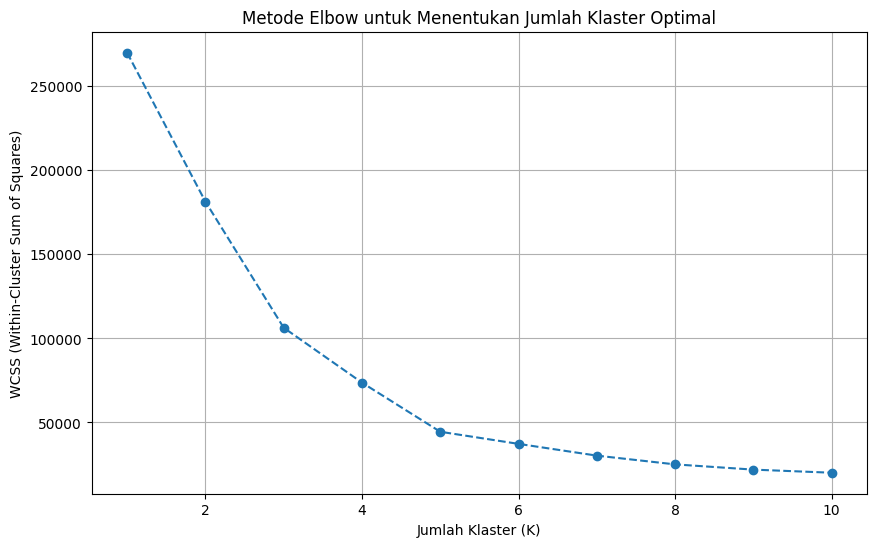

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

Penerapan K-Means

In [ ]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans
print(f"\nDistribusi jumlah data di setiap klaster (k={optimal_k}):")
print(df['Cluster'].value_counts().sort_index())

centers = kmeans.cluster_centers_


Distribusi jumlah data di setiap klaster (k=5):
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


Visualisasi hasil clustering

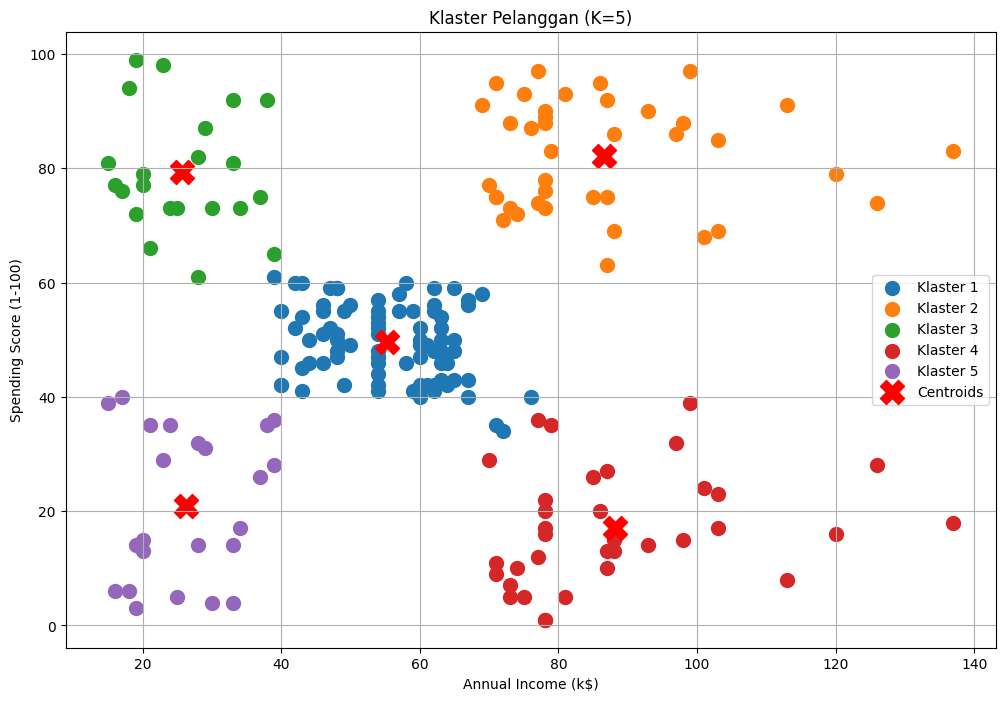

In [ ]:
plt.figure(figsize=(12, 8))

for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=100, label=f'Klaster {i+1}')

plt.scatter(centers[:, 0], centers[:, 1],
            s=300, c='red', marker='X', label='Centroids')

plt.title(f'Klaster Pelanggan (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Tugas DBSCAN


**1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.**

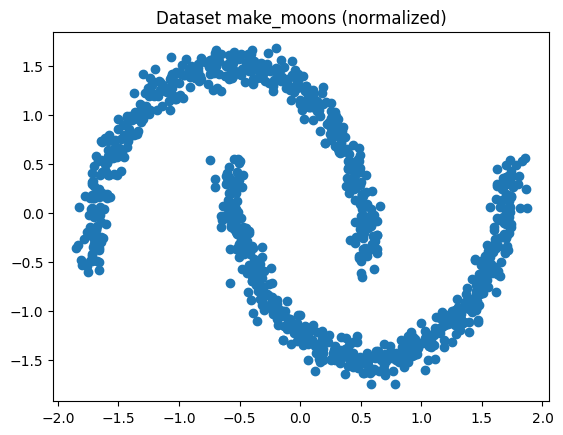

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title("Dataset make_moons (normalized)")
plt.show()


**2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.**

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah klaster: {n_clusters}")
print(f"Jumlah noise: {n_noise}")


Jumlah klaster: 2
Jumlah noise: 0


**3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.**

In [ ]:
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(y, labels))
print("Completeness:", metrics.completeness_score(y, labels))
print("V-measure:", metrics.v_measure_score(y, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))
print("AMI:", metrics.adjusted_mutual_info_score(y, labels))

if n_clusters > 1:
    print("Silhouette:", metrics.silhouette_score(X_scaled, labels))
else:
    print("Silhouette: Tidak bisa dihitung (hanya 1 klaster)")


Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


**4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).**

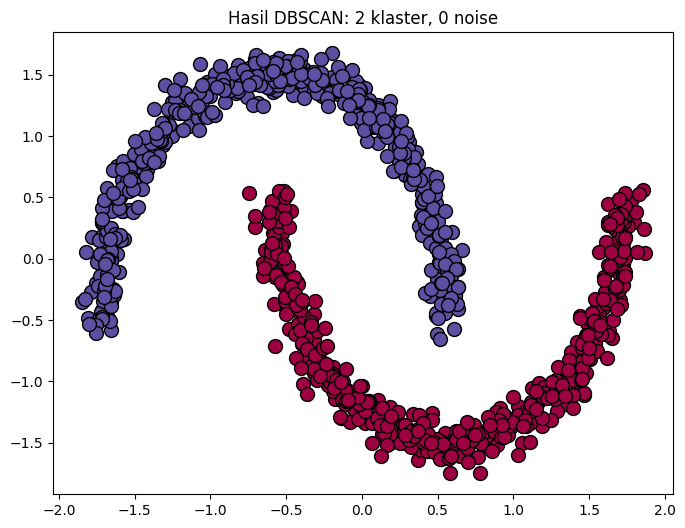

In [ ]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title(f"Hasil DBSCAN: {n_clusters} klaster, {n_noise} noise")
plt.show()


**5. Lakukan eksperimen:**

eps = 0.05, 0.1, 0.3, 0.5

min_samples = 3, 10, 20

Catat perubahan klaster, noise, dan kualitas evaluasi.

In [ ]:
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print(f"\nEps={eps}, Min_samples={min_s}")
        print(f"  Jumlah klaster: {n_clusters}")
        print(f"  Jumlah noise: {n_noise}")
        if n_clusters > 1:
            silhouette = metrics.silhouette_score(X_scaled, labels)
            print(f"  Silhouette Score: {silhouette:.3f}")



Eps=0.05, Min_samples=3
  Jumlah klaster: 69
  Jumlah noise: 186
  Silhouette Score: 0.113

Eps=0.05, Min_samples=10
  Jumlah klaster: 3
  Jumlah noise: 970
  Silhouette Score: -0.294

Eps=0.05, Min_samples=20
  Jumlah klaster: 0
  Jumlah noise: 1000

Eps=0.1, Min_samples=3
  Jumlah klaster: 2
  Jumlah noise: 14
  Silhouette Score: 0.252

Eps=0.1, Min_samples=10
  Jumlah klaster: 7
  Jumlah noise: 57
  Silhouette Score: 0.162

Eps=0.1, Min_samples=20
  Jumlah klaster: 6
  Jumlah noise: 850
  Silhouette Score: -0.360

Eps=0.3, Min_samples=3
  Jumlah klaster: 2
  Jumlah noise: 0
  Silhouette Score: 0.391

Eps=0.3, Min_samples=10
  Jumlah klaster: 2
  Jumlah noise: 0
  Silhouette Score: 0.391

Eps=0.3, Min_samples=20
  Jumlah klaster: 2
  Jumlah noise: 0
  Silhouette Score: 0.391

Eps=0.5, Min_samples=3
  Jumlah klaster: 2
  Jumlah noise: 0
  Silhouette Score: 0.391

Eps=0.5, Min_samples=10
  Jumlah klaster: 2
  Jumlah noise: 0
  Silhouette Score: 0.391

Eps=0.5, Min_samples=20
  Jumlah 